# Video Game Market Intelligence: Sales Drivers & 2017 Launch Strategy

### Análisis  de Ventas de Videojuegos para la tienda Ice

## Paso 1: Carga de Data Set 

Importación de Librerias:

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Carga de datos y generalidades de los mismos:

In [2]:
# Cargar los datos
df = pd.read_csv('/datasets/games.csv')

In [3]:
# Vista general
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 16715 entries, 0 to 16714
,Data columns (total 11 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   Name             16713 non-null  object 
, 1   Platform         16715 non-null  object 
, 2   Year_of_Release  16446 non-null  float64
, 3   Genre            16713 non-null  object 
, 4   NA_sales         16715 non-null  float64
, 5   EU_sales         16715 non-null  float64
, 6   JP_sales         16715 non-null  float64
, 7   Other_sales      16715 non-null  float64
, 8   Critic_Score     8137 non-null   float64
, 9   User_Score       10014 non-null  object 
, 10  Rating           9949 non-null   object 
,dtypes: float64(6), object(5)
,memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Paso 2: Preparación de Datos

Limpieza de datos para las Columnas:

In [4]:
# Renombrar Columnas (cambiar todo a minusculas)
df.columns = df.columns.str.lower()

Limpieza de datos a user_score:

In [5]:
# Ver valores únicos para detectar problemas
print(df['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
, '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
, '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
, '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
, '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
, '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
, '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
, '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


In [6]:
# Reemplazar 'tbd' con nan
df['user_score'] = df['user_score'].replace('tbd', None)

# Convertir a float 
df['user_score'] = df['user_score'].astype(float)

Limpieza de datos a year_of_release:

In [7]:
# Verificar valores únicos
print(df['year_of_release'].unique())

df['year_of_release'] = df['year_of_release'].replace('tbd', None)

# Se encontró valores ausentes en la colimna year_of_release. Eliminar calores ausentes y convertir la columna a entero.

# Eliminar filas con valores ausentes en 'year_of_release'
df = df[df['year_of_release'].notna()]

# Convertir a entero
df['year_of_release'] = df['year_of_release'].astype(int)

# Comprobación
print(df['year_of_release'].dtype)


[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
, 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
, 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
, 1980. 1983.]
,int64


Crear columna global_sales :

In [8]:
df['global_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
,Int64Index: 16446 entries, 0 to 16714
,Data columns (total 12 columns):
, #   Column           Non-Null Count  Dtype  
,---  ------           --------------  -----  
, 0   name             16444 non-null  object 
, 1   platform         16446 non-null  object 
, 2   year_of_release  16446 non-null  int64  
, 3   genre            16444 non-null  object 
, 4   na_sales         16446 non-null  float64
, 5   eu_sales         16446 non-null  float64
, 6   jp_sales         16446 non-null  float64
, 7   other_sales      16446 non-null  float64
, 8   critic_score     7983 non-null   float64
, 9   user_score       8609 non-null   float64
, 10  rating           9768 non-null   object 
, 11  global_sales     16446 non-null  float64
,dtypes: float64(7), int64(1), object(4)
,memory usage: 1.6+ MB


## Paso 3: Análisis de Datos

> Cuantos Juegos fueron lanzados en las diferentes plataformas :

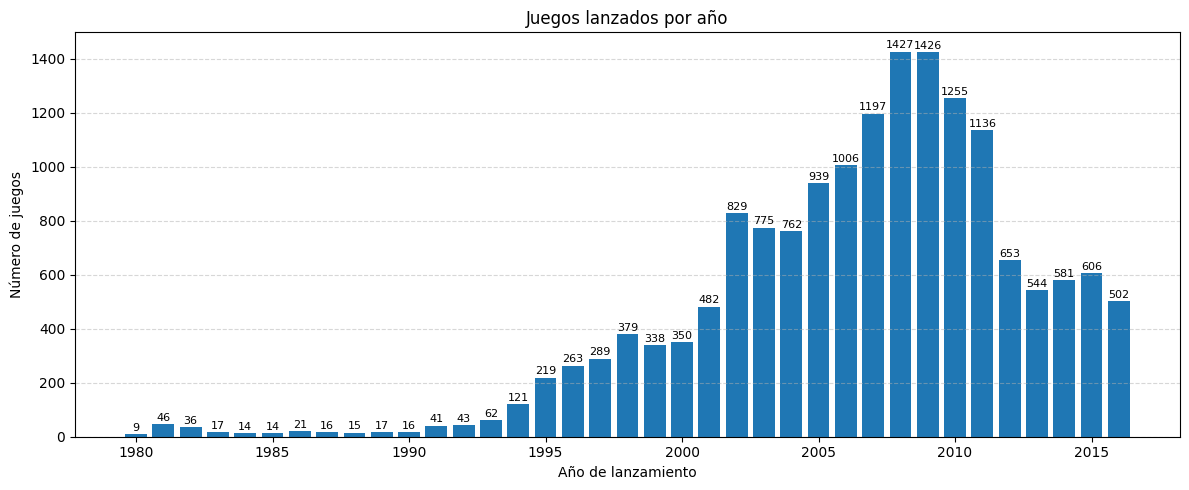

In [10]:
# Contar juegos por año y ordenar por año
games_per_year = df['year_of_release'].value_counts().sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(12, 5))
bars = plt.bar(games_per_year.index.astype(int), games_per_year.values)

# Agregar etiquetas a cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 5, int(height), 
             ha='center', va='bottom', fontsize=8)

# Personalizar ejes y título
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de juegos')
plt.title('Juegos lanzados por año')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

> Evolución de ventas por plataforma :

Identificar las plataformas con mayores ventas totales

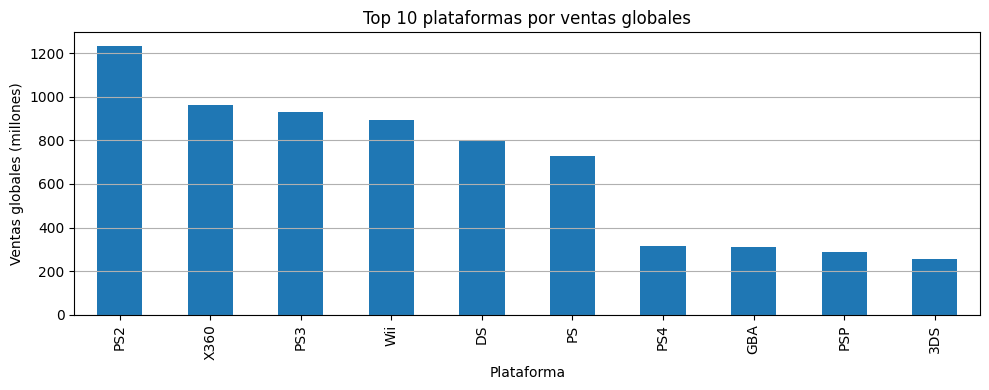

In [11]:
# Calcular ventas totales por plataforma
platform_totals = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False)
top_platforms = platform_totals.head(10)
top_platforms.plot(kind='bar', figsize=(10, 4), title='Top 10 plataformas por ventas globales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Evolución por año de las plataformas más populares

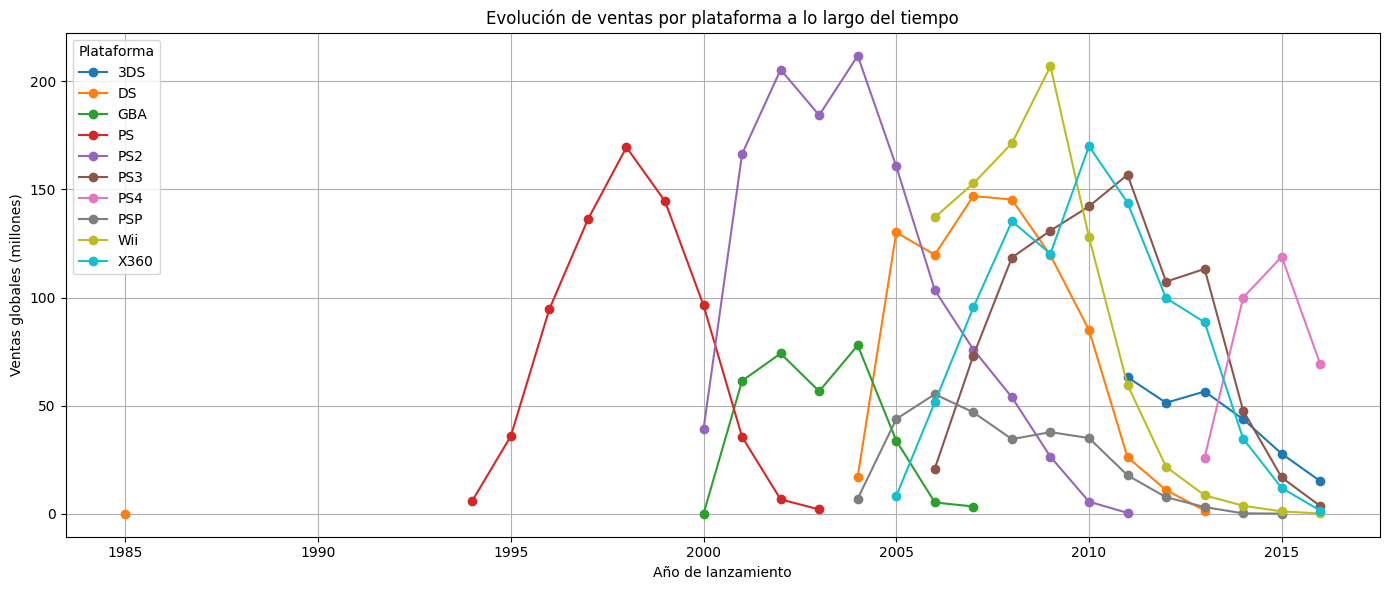

In [12]:
# Filtrar por plataformas principales
main_platforms = top_platforms.index.tolist()

# Crear tabla dinámica: ventas por año y plataforma
platform_year_sales = df[df['platform'].isin(main_platforms)].pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='global_sales', 
    aggfunc='sum'
)

# Graficar evolución
plt.figure(figsize=(14, 6))
platform_year_sales.plot(ax=plt.gca(), marker='o')
plt.title('Evolución de ventas por plataforma a lo largo del tiempo')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()


Análisis de aparición y desaparición de plataformas

In [13]:
# Agrupar por plataforma y obtener el primer y último año con ventas
lifespan = df.groupby('platform')['year_of_release'].agg(['min', 'max']).loc[main_platforms]
lifespan['duración'] = lifespan['max'] - lifespan['min'] + 1
print(lifespan)

           min   max  duración
,platform                      
,PS2       2000  2011        12
,X360      2005  2016        12
,PS3       2006  2016        11
,Wii       2006  2016        11
,DS        1985  2013        29
,PS        1994  2003        10
,PS4       2013  2016         4
,GBA       2000  2007         8
,PSP       2004  2015        12
,3DS       2011  2016         6


Observamos que plataformas como PS2 y X360 dominaron el mercado durante varios años, pero gradualmente fueron reemplazadas.
En el gráfico de líneas se nota claramente el ciclo de vida de las consolas:
- Las plataformas generalmente alcanzan su punto máximo de ventas entre 3 y 5 años después de su aparición.
- La desaparición suele ocurrir en un periodo de 2 a 4 años después del pico, conforme los desarrolladores y consumidores migran a nuevas tecnologías.

> ¿Qué período de datos debemos usar para predecir 2017?

In [14]:
# Revisar cuántos juegos hay por año reciente
df['year_of_release'].value_counts().sort_index(ascending=False)

2016     502
2015     606
2014     581
2013     544
2012     653
2011    1136
2010    1255
2009    1426
2008    1427
2007    1197
2006    1006
2005     939
2004     762
2003     775
2002     829
2001     482
2000     350
1999     338
1998     379
1997     289
1996     263
1995     219
1994     121
1993      62
1992      43
1991      41
1990      16
1989      17
1988      15
1987      16
1986      21
1985      14
1984      14
1983      17
1982      36
1981      46
1980       9
Name: year_of_release, dtype: int64

In [15]:
# Filtrar desde 2013 a 2016
df_recent = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]
# Verificar resultados
df_recent['year_of_release'].value_counts().sort_index()


2013    544
2014    581
2015    606
2016    502
Name: year_of_release, dtype: int64

Decidimos trabajar únicamente con los datos del período 2013 a 2016, ya que:

- Representa la generación más reciente de consolas activas en 2017.
- Estos años incluyen un volumen suficiente de lanzamientos anuales para análisis confiables.
- Los datos de 2016 reflejan tendencias más cercanas a 2017 para el análisis.


> Plataformas líderes en ventas entre 2013 a 2016 :

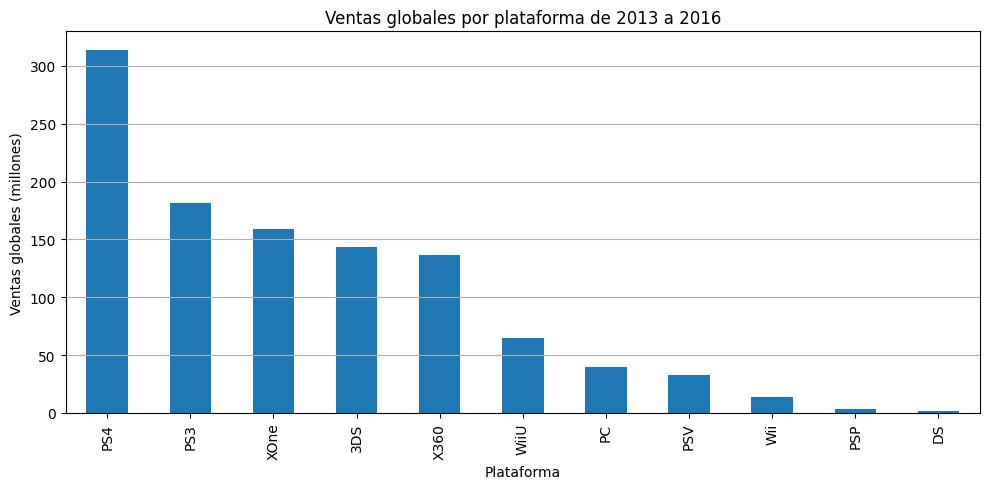

In [16]:
# Ventas totales por plataforma en el período filtrado
platform_sales = df_recent.groupby('platform')['global_sales'].sum().sort_values(ascending=False)

# Visualización
platform_sales.plot(kind='bar', figsize=(10, 5), title='Ventas globales por plataforma de 2013 a 2016')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


> Diagrama de caja por plataforma :

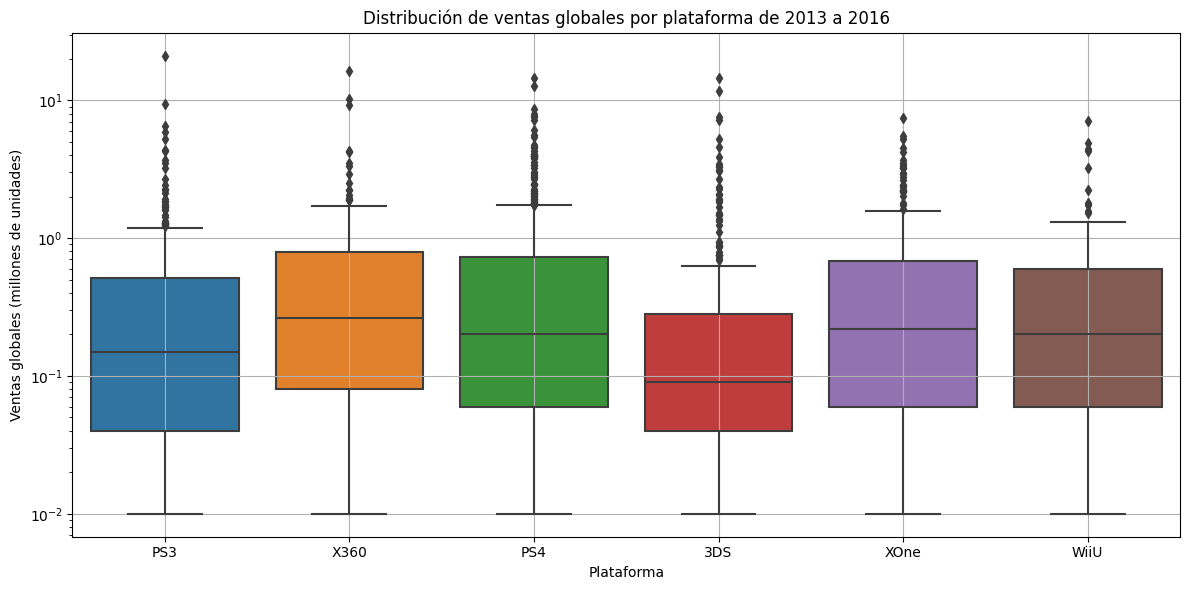

In [17]:

# Seleccionar plataformas más relevantes para el análisis visual (las 6 principales)
top_platforms = df_recent.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(6).index

# Filtrar el DataFrame solo para esas plataformas
filtered_box = df_recent[df_recent['platform'].isin(top_platforms)]

# Crear boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_box, x='platform', y='global_sales')
plt.title('Distribución de ventas globales por plataforma de 2013 a 2016')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones de unidades)')
plt.yscale('log')  # Escala logarítmica para ver mejor los outliers
plt.grid(True)
plt.tight_layout()
plt.show()




El diagrama de caja muestra la distribución de las ventas globales por juego en las plataformas principales entre 2013 y 2016:

La mayoría de los juegos vende menos de 1 millón de unidades, lo cual es evidente por la concentración de los cuartiles inferiores. Sin embargo, hay múltiples outliers en todas las plataformas, especialmente en PS4 y XOne, donde algunos juegos superan los 5 o incluso 10 millones de unidades.
La mediana de ventas es ligeramente mayor en PS4 y 3DS que en otras plataformas, lo que indica que sus títulos tienen un rendimiento más sólido en promedio. La dispersióntambién varía: PS4 y XOne muestran una gama amplia de ventas, mientras que WiiU tiene ventas más concentradas y menores en general.
En resumen, aunque muchas plataformas comparten una mayoría de juegos con ventas modestas, las diferencias en medianas, rangos y outliers sí son significativas. Las plataformas con mayor potencial para ventas elevadas son PS4 y XOne, seguidas de 3DS.


> Estudio de la influencia de las reseñas en las ventas de la plataforma Xbox One : 

Usando el data frame df_recent filtrado por esta plataforma, y compararemos:

critic_score vs. global_sales
user_score vs. global_sales


In [18]:
# Filtrar datos de Xbox One con reseñas disponibles
xone_data = df_recent[(df_recent['platform'] == 'XOne') & 
                      (df_recent['critic_score'].notna()) & 
                      (df_recent['user_score'].notna())]


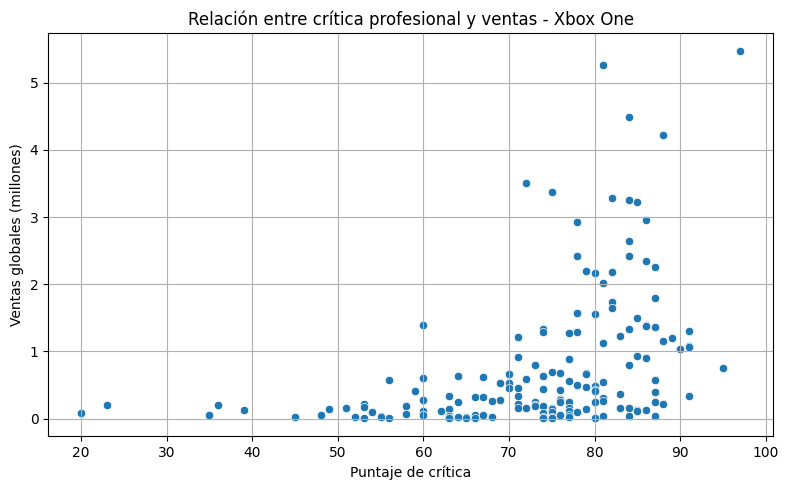

In [19]:
# Gráfico de dispersión – Críticas profesionales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=xone_data, x='critic_score', y='global_sales')
plt.title('Relación entre crítica profesional y ventas - Xbox One')
plt.xlabel('Puntaje de crítica')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()


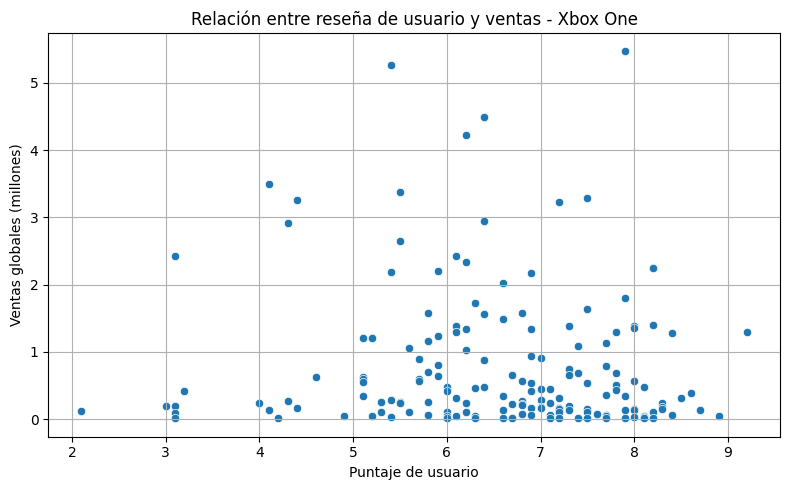

In [20]:
# Gráfico de dispersión – Reseñas de usuarios
plt.figure(figsize=(8, 5))
sns.scatterplot(data=xone_data, x='user_score', y='global_sales')
plt.title('Relación entre reseña de usuario y ventas - Xbox One')
plt.xlabel('Puntaje de usuario')
plt.ylabel('Ventas globales (millones)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Correlaciones
correlations = xone_data[['critic_score', 'user_score', 'global_sales']].corr()
print(correlations)


              critic_score  user_score  global_sales
,critic_score      1.000000    0.453023      0.413540
,user_score        0.453023    1.000000     -0.097503
,global_sales      0.413540   -0.097503      1.000000


Se analizaron las relaciones entre las ventas globales y las reseñas de usuarios y críticos para juegos de Xbox One (2013–2016):
En Xbox One, las críticas profesionales tienen cierta influencia positiva en las ventas, mientras que las reseñas de usuarios tienen poca o ninguna correlación directa. Las campañas pueden beneficiarse de buenas calificaciones por parte de críticos especializados.

> Comparar las ventas de los mismos juegos que salieron en Xbox One con sus versiones en otras plataformas, y analizar si hay diferencias significativas.

Filtramos juegos que salieron en más de una plataforma y seleccionamos los que incluyen Xbox One.

In [22]:
# Agrupar por nombre y contar cuántas plataformas tiene cada juego
multi_platform_titles = df_recent.groupby('name')['platform'].nunique()
multi_platform_names = multi_platform_titles[multi_platform_titles > 1].index

# Filtrar los juegos multiplataforma que incluyan XOne
df_multi = df_recent[df_recent['name'].isin(multi_platform_names)]
df_xone_multi = df_multi[df_multi['name'].isin(
    df_recent[df_recent['platform'] == 'XOne']['name'].unique()
)]

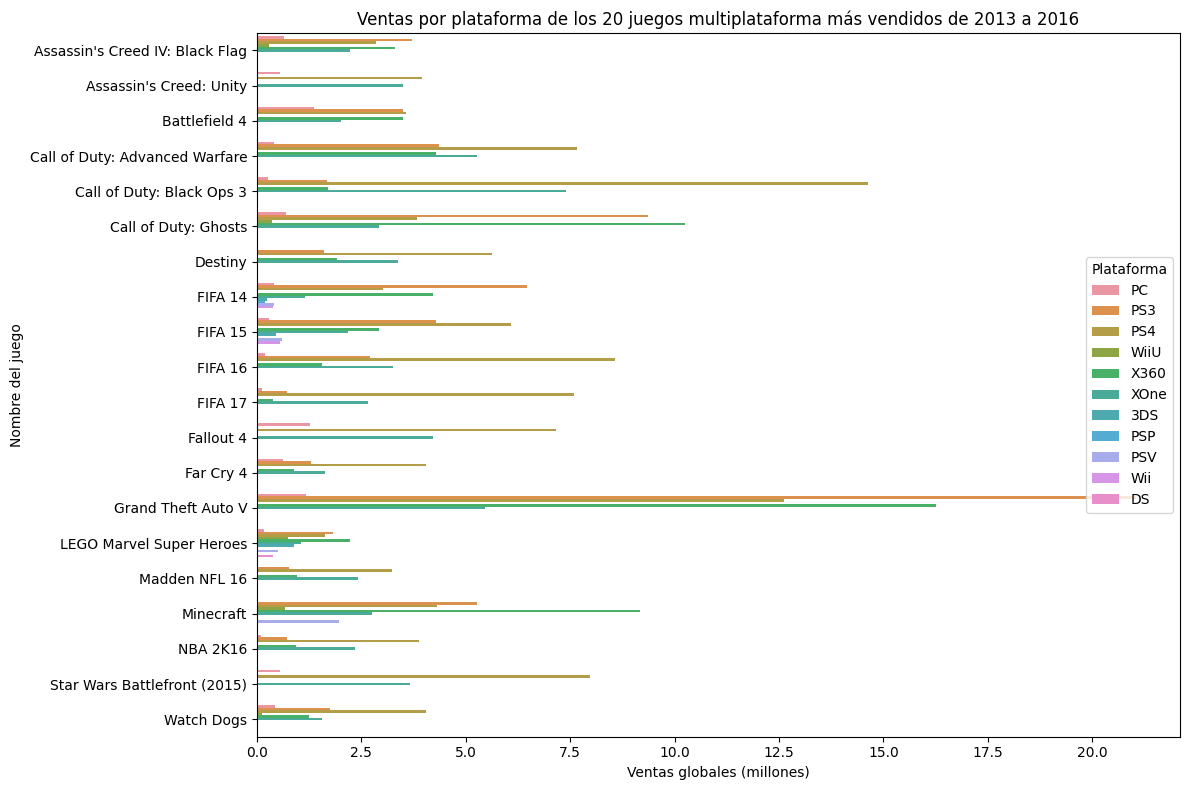

In [23]:
# Agrupamos por nombre y plataforma para ver cuánto vendió cada versión.

sales_comparison = df_xone_multi.groupby(['name', 'platform'])['global_sales'].sum().reset_index()

# Ordenar por ventas y quedarnos con los 20 títulos más populares
top_titles = sales_comparison.groupby('name')['global_sales'].sum().sort_values(ascending=False).head(20).index
top_sales = sales_comparison[sales_comparison['name'].isin(top_titles)]

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(data=top_sales, x='global_sales', y='name', hue='platform')
plt.title('Ventas por plataforma de los 20 juegos multiplataforma más vendidos de 2013 a 2016')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Nombre del juego')
plt.legend(title='Plataforma')
plt.tight_layout()
plt.show()



> Análisis de la distribución de ventas por género en el periodo de 2013 a 2016.

Número de juegos por género :

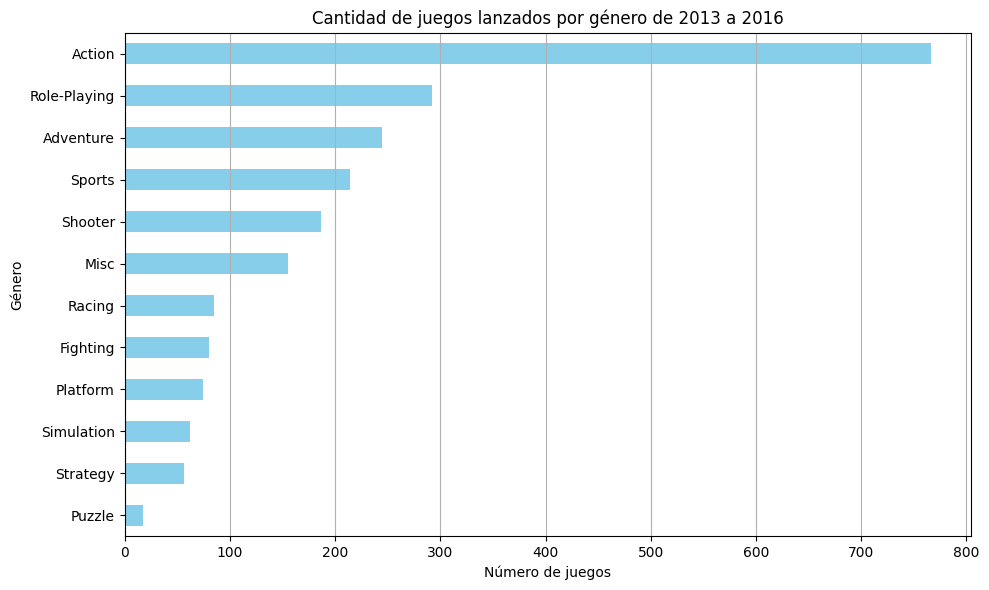

In [24]:
genre_counts = df_recent['genre'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='barh', color='skyblue')
plt.title('Cantidad de juegos lanzados por género de 2013 a 2016')
plt.xlabel('Número de juegos')
plt.ylabel('Género')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Ventas totales por género :

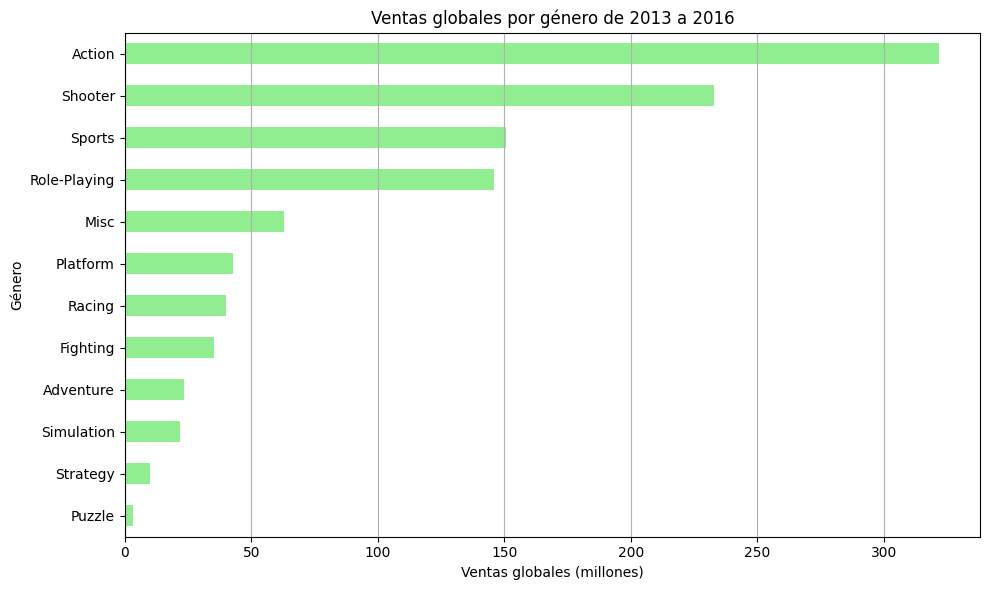

In [25]:
genre_sales = df_recent.groupby('genre')['global_sales'].sum().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='barh', color='lightgreen')
plt.title('Ventas globales por género de 2013 a 2016')
plt.xlabel('Ventas globales (millones)')
plt.ylabel('Género')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Ventas promedio por juego :

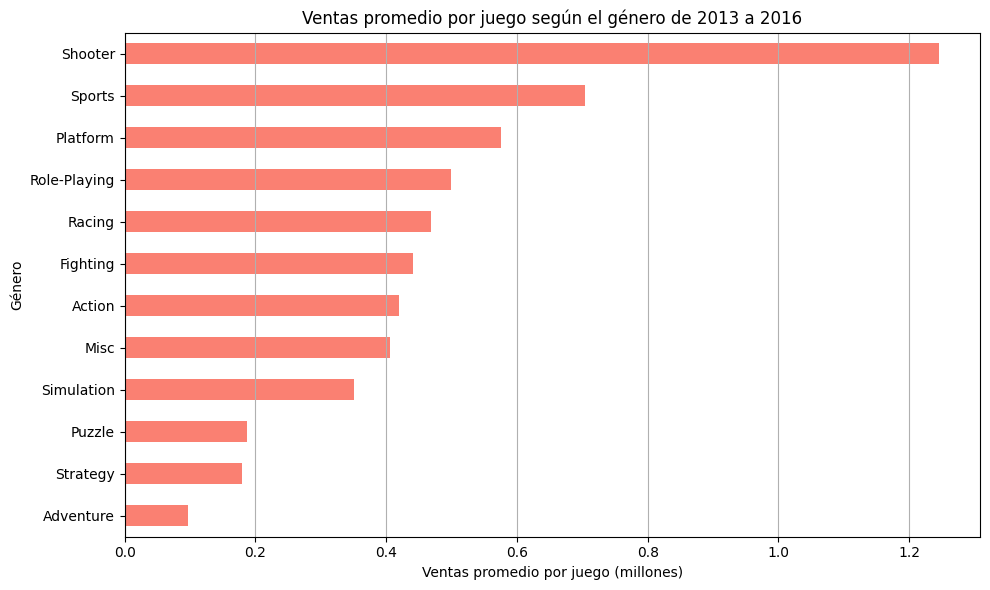

In [26]:
genre_avg_sales = df_recent.groupby('genre')['global_sales'].mean().sort_values(ascending=True)

plt.figure(figsize=(10, 6))
genre_avg_sales.plot(kind='barh', color='salmon')
plt.title('Ventas promedio por juego según el género de 2013 a 2016')
plt.xlabel('Ventas promedio por juego (millones)')
plt.ylabel('Género')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


En los tres gráficos anteriores se analizaron los géneros desde tres perspectivas: cantidad de juegos lanzados, ventas totales y ventas promedio por título.
La cantidad de juegos más comunes son Action, Role-Playin y Sports. En contraste los géneros con menos lanzamientos son Puzzle, Strategy y Adventure. 
En terminos de ventas totales los géneros Action, Shooter y Sports lideran las ventas por su alta popularidad y muchos lanzamientos. Las ventas promedio por juego son los shooter y Platmof quienes tienen un alto rendimiento promedio por juego. 

## Paso 4: Perfil de usuario para cada región (NA, UE, JP)

Top 5 plataformas por región

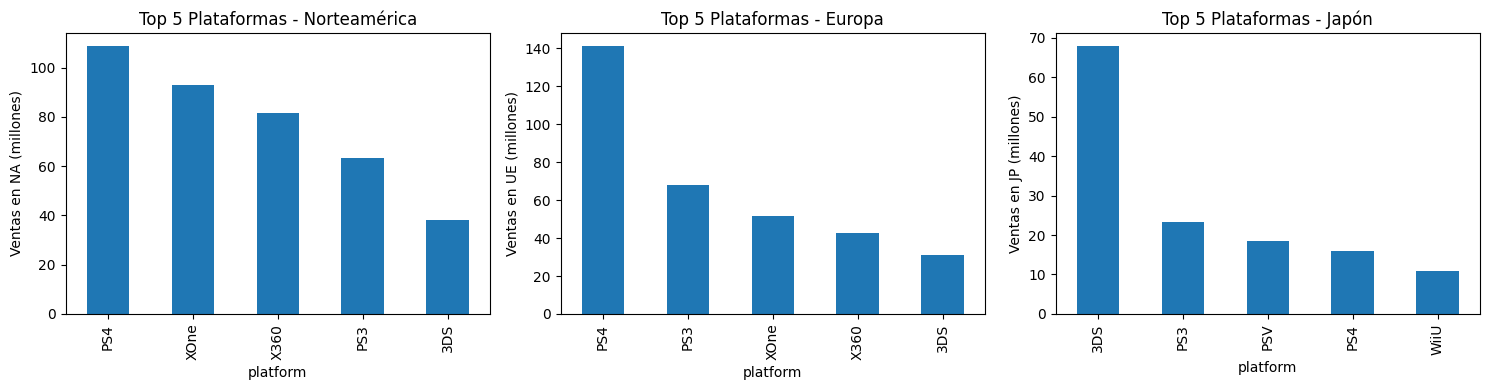

In [27]:
# Top 5 plataformas por región
na_platforms = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_platforms = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_platforms = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Visualización
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
na_platforms.plot(kind='bar', title='Top 5 Plataformas - Norteamérica')
plt.ylabel('Ventas en NA (millones)')

plt.subplot(1, 3, 2)
eu_platforms.plot(kind='bar', title='Top 5 Plataformas - Europa')
plt.ylabel('Ventas en UE (millones)')

plt.subplot(1, 3, 3)
jp_platforms.plot(kind='bar', title='Top 5 Plataformas - Japón')
plt.ylabel('Ventas en JP (millones)')

plt.tight_layout()
plt.show()


Top 5 géneros por región

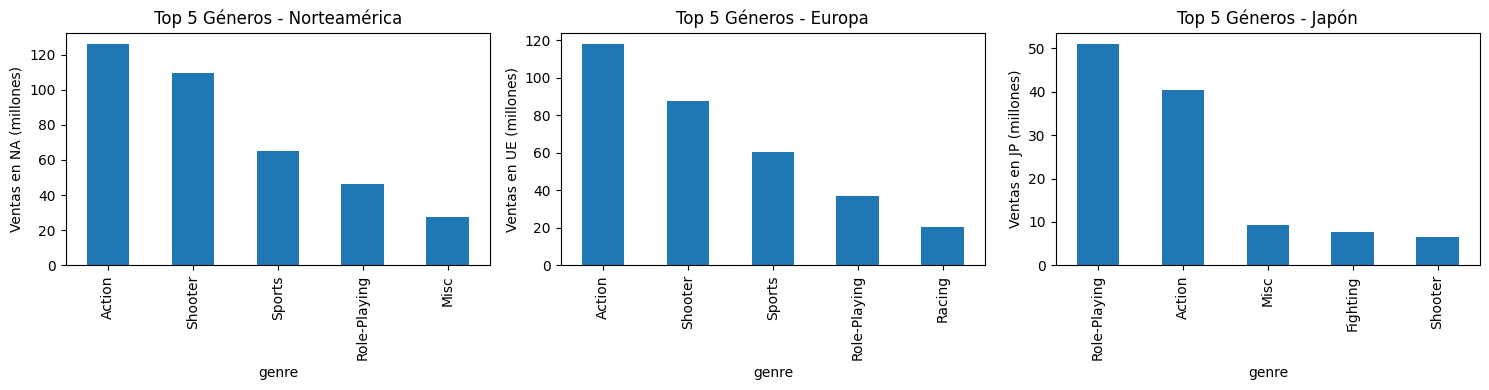

In [28]:
# Top géneros por región
na_genres = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
eu_genres = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
jp_genres = df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Visualización
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
na_genres.plot(kind='bar', title='Top 5 Géneros - Norteamérica')
plt.ylabel('Ventas en NA (millones)')

plt.subplot(1, 3, 2)
eu_genres.plot(kind='bar', title='Top 5 Géneros - Europa')
plt.ylabel('Ventas en UE (millones)')

plt.subplot(1, 3, 3)
jp_genres.plot(kind='bar', title='Top 5 Géneros - Japón')
plt.ylabel('Ventas en JP (millones)')

plt.tight_layout()
plt.show()


¿Influye el rating ESRB (rating) en cada región?
> ¿Qué es el ESRB?
ESRB significa Entertainment Software Rating Board (Junta de Clasificación de Software de Entretenimiento). Es un sistema utilizado en América del Norte para clasificar videojuegos según la edad recomendada del público y el contenido.
>
| Clasificación | Significado           | Público objetivo               |
| ------------- | --------------------- | ------------------------------ |
| **E**         | Everyone              | Apto para todos (6 años o más) |
| **E10+**      | Everyone 10 and older | A partir de 10 años            |
| **T**         | Teen                  | A partir de 13 años            |
| **M**         | Mature                | A partir de 17 años            |
| **AO**        | Adults Only           | Solo adultos (18+)             |
| **RP**        | Rating Pending        | Aún sin calificación oficial   |

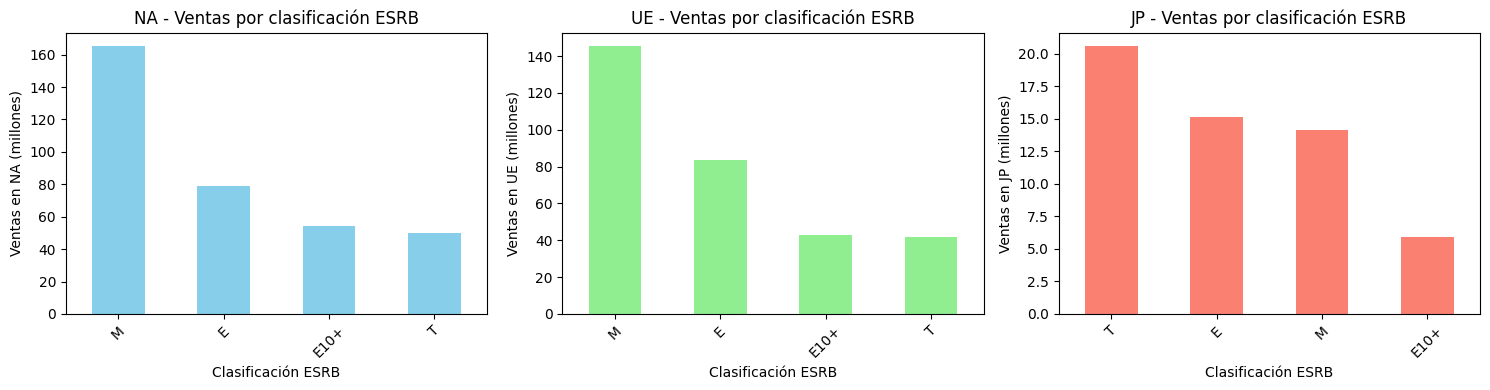

In [29]:
# Agrupar ventas por clasificación ESRB en cada región
esrb_na = df_recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = df_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = df_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 4))

# NA
plt.subplot(1, 3, 1)
esrb_na.plot(kind='bar', title='NA - Ventas por clasificación ESRB', color='skyblue')
plt.ylabel('Ventas en NA (millones)')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation=45)

# EU
plt.subplot(1, 3, 2)
esrb_eu.plot(kind='bar', title='UE - Ventas por clasificación ESRB', color='lightgreen')
plt.ylabel('Ventas en UE (millones)')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation=45)

# JP
plt.subplot(1, 3, 3)
esrb_jp.plot(kind='bar', title='JP - Ventas por clasificación ESRB', color='salmon')
plt.ylabel('Ventas en JP (millones)')
plt.xlabel('Clasificación ESRB')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Paso 5: Prueba de Hipótesis 

> Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para Xbox One y PC son iguales.

Hipótesis alternativa (H₁): Las calificaciones promedio son diferentes.

Esta es una prueba de dos colas.

In [30]:
# Filtrar calificaciones válidas
xone_scores = df_recent[(df_recent['platform'] == 'XOne') & (df_recent['user_score'].notna())]['user_score']
pc_scores = df_recent[(df_recent['platform'] == 'PC') & (df_recent['user_score'].notna())]['user_score']

# Prueba de Levene para igualdad de varianzas
levene_result = stats.levene(xone_scores, pc_scores)
print("p-valor de la prueba de Levene:", levene_result.pvalue)

# Configurar equal_var según resultado de Levene
equal_var = levene_result.pvalue >= 0.05

# Prueba t
t_test_result = stats.ttest_ind(xone_scores, pc_scores, equal_var=equal_var)
print("p-valor de la prueba t:", t_test_result.pvalue)

# Comparar con alpha
alpha = 0.05
if t_test_result.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print('No podemos rechazar la hipótesis nula')



p-valor de la prueba de Levene: 0.0028952548768581485
,p-valor de la prueba t: 0.16097023533449153
,No podemos rechazar la hipótesis nula


> Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

H₀ (hipótesis nula): Las calificaciones promedio de usuarios para los géneros Action y Sports son iguales.

H₁ (hipótesis alternativa): Las calificaciones promedio de usuarios son diferentes.

In [31]:
from scipy import stats

# Filtrar datos válidos de Action y Sports
action_scores = df_recent[(df_recent['genre'] == 'Action') & (df_recent['user_score'].notna())]['user_score']
sports_scores = df_recent[(df_recent['genre'] == 'Sports') & (df_recent['user_score'].notna())]['user_score']

# Prueba de Levene para igualdad de varianzas
levene_result = stats.levene(action_scores, sports_scores)
print("p-valor de la prueba de Levene:", levene_result.pvalue)

# Configurar equal_var según resultado de Levene
equal_var = levene_result.pvalue >= 0.05

# Prueba t para comparación de medias
t_test_result = stats.ttest_ind(action_scores, sports_scores, equal_var=equal_var)
print("p-valor de la prueba t:", t_test_result.pvalue)

# Comparar con nivel de significancia
alpha = 0.05
if t_test_result.pvalue < alpha:
    print('Rechazamos la hipótesis nula')
else:
    print("No podemos rechazar la hipótesis nula")


p-valor de la prueba de Levene: 1.613346992877105e-06
,p-valor de la prueba t: 6.884181624404655e-19
,Rechazamos la hipótesis nula


#### ¿Cómo se formularon las hipótesis?
En ambos casos, el objetivo fue comparar calificaciones promedio de usuarios entre dos grupos, lo que requiere contrastar dos medias. Por ello se formularon las siguientes hipótesis estadísticas:

    Hipótesis 1: Xbox One vs PC
- H₀ (hipótesis nula): Las calificaciones promedio de los usuarios para Xbox One y PC **son iguales**.
- H₁ (hipótesis alternativa): Las calificaciones promedio **son diferentes**.

    Hipótesis 2: Géneros Action vs Sports
- H₀ (hipótesis nula): Las calificaciones promedio de los usuarios para los géneros Action y Sports **son iguales**.
- H₁ (hipótesis alternativa): Las calificaciones promedio **son diferentes**.

En ambos casos se trató de una prueba bilateral, ya que no se asumía de antemano cuál grupo obtendría una calificación más alta.


#### ¿Qué criterio se utilizó para probar las hipótesis y por qué?

    1. Prueba de Levene – Verificación de igualdad de varianzas
Antes de aplicar la prueba t de Student, se evaluó si ambas muestras tenían **varianzas similares** utilizando la prueba de Levene.  
- Si `p ≥ 0.05`: no se rechaza H₀ → se asume igualdad de varianzas → `equal_var=True`.
- Si `p < 0.05`: se rechaza H₀ → se asume varianzas distintas → `equal_var=False`.

Esto permite configurar correctamente el parámetro `equal_var` en `ttest_ind`, lo cual es importante para garantizar la validez estadística de la prueba t.

    2. Prueba t de Student – Comparación de medias
Se utilizó `scipy.stats.ttest_ind()` para comparar las medias entre los dos grupos. Esta prueba permite determinar si la diferencia observada es estadísticamente significativa.

Se estableció un nivel de significancia α = 0.05:
- Si `p < α`: se rechaza la hipótesis nula → hay diferencia significativa.
- Si `p ≥ α`: no se rechaza la hipótesis nula → no hay diferencia significativa.

## Paso 6: Conclusión general

#### Objetivo del Proyecto.
Este proyecto tiene como objetivo analizar los datos históricos de ventas de videojuegos y los factores asociados, tales como la plataforma, el género, la región, las reseñas de usuarios y la clasificación ESRB, con el fin de obtener información estratégica para la industria del gaming. Este estudio combina técnicas de análisis exploratorio, visualización de datos y pruebas estadísticas para proporcionar recomendaciones accionables basadas en evidencia.

#### Preparación de los Datos.
Para garantizar la calidad del análisis, se realizaron varias acciones de limpieza y transformación. Primero, se normalizaron los nombres de las columnas convirtiéndolos a minúsculas para facilitar su manipulación. Posteriormente, se eliminaron o transformaron los valores no numéricos, como 'tbd', que impedían un análisis cuantitativo adecuado. También se creó la columna global_sales, calculando la suma de las ventas por región (Norteamérica, Europa, Japón y otras). Finalmente, se filtraron los datos para conservar únicamente los registros correspondientes a los años 2013 a 2016, excluyendo aquellos de años obsoletos. Estas acciones permitieron depurar el conjunto de datos y enfocarse en un período reciente y relevante para los objetivos del proyecto.

#### Análisis de la evolución del Mercado.
Durante el período analizado, el volumen de lanzamientos de videojuegos se mantuvo relativamente estable entre 2013 y 2015, con más de 500 títulos por año. En 2016 se observó una ligera disminución en la cantidad de lanzamientos, lo cual puede explicarse por una consolidación del mercado o por datos incompletos, como se indica en la descripción del proyecto.

En cuanto a las plataformas, la PlayStation 4 (PS4) muestra un crecimiento sostenido desde su lanzamiento en 2013, posicionándose como la plataforma dominante al final del período. Xbox One (XOne) también experimenta una evolución positiva, aunque con un volumen de ventas menor en comparación con PS4. La consola portátil Nintendo 3DS mantiene una presencia fuerte, especialmente en Japón, aunque presenta una tendencia descendente hacia 2016. En contraste, plataformas de la generación anterior como PS3, Xbox 360 y WiiU entran en una fase clara de declive, con una caída progresiva en sus ventas año con año.

El análisis también evidencia que las plataformas más recientes suelen tardar entre uno y dos años en consolidarse en el mercado. Por otro lado, las consolas más antiguas continúan activas por un tiempo tras la llegada de nuevas generaciones, pero sus ventas disminuyen de forma constante. A partir de 2013, se observa una transición evidente hacia la nueva generación de consolas, con una sustitución gradual de las plataformas anteriores.

En resumen, el mercado de videojuegos entre 2013 y 2016 refleja una evolución clara a favor de las consolas de nueva generación. PS4 y Xbox One se perfilan como las plataformas más prometedoras para campañas de marketing en 2017, mientras que la 3DS, aunque aún relevante en algunas regiones, muestra señales de retroceso. Este análisis temporal permite identificar con precisión cuáles plataformas siguen siendo rentables y cuáles han quedado obsoletas para efectos comerciales.

#### Análisis Géneros más rentables.

El análisis de los géneros de videojuegos entre 2013 y 2016 muestra que los títulos clasificados como Action, Shooter y Sports concentran la mayor parte de las ventas globales. Estos géneros no solo son los más populares en cuanto a número de lanzamientos, sino también los que generan mayores ingresos totales. Esta popularidad se debe en parte a la amplia base de jugadores interesados en experiencias rápidas, competitivas y visualmente atractivas, lo cual convierte a estos géneros en una apuesta segura para las campañas de distribución masiva.

Sin embargo, cuando se analizan las ventas promedio por juego, surgen matices interesantes. Aunque el género Action lidera en volumen total, sus ventas promedio por título son más moderadas debido a la gran cantidad de lanzamientos, muchos de los cuales tienen un desempeño comercial limitado. En contraste, los géneros Shooter y Platform destacan en términos de rentabilidad individual: cada juego lanzado en estas categorías tiende a vender más unidades en promedio, lo que los convierte en géneros de alto retorno por título, aunque su frecuencia de aparición sea menor que en otros géneros.

Por otro lado, géneros como Puzzle, Strategy y Adventure muestran un volumen de ventas significativamente menor, tanto en términos totales como por título. Aunque pueden tener comunidades de jugadores muy leales, su impacto comercial general es limitado. Esto indica que, si bien pueden ser rentables en nichos específicos o mediante estrategias especializadas, no representan una oportunidad tan atractiva para campañas publicitarias masivas orientadas al volumen.

En conclusión, los datos confirman que los géneros Action, Shooter y Sports no solo dominan el mercado en términos de popularidad, sino que también ofrecen mayor potencial de rentabilidad para las campañas comerciales, especialmente cuando se evalúan desde la perspectiva de ventas promedio por juego.


### Análisis de Usuario por Región.
El análisis por región revela diferencias claras en las preferencias de consumo de videojuegos, tanto en términos de plataformas como de géneros y sensibilidad hacia las clasificaciones de edad. En Norteamérica, las plataformas más exitosas son PlayStation 4, Xbox One y Nintendo 3DS, con una fuerte inclinación del mercado hacia las consolas de sobremesa. Los géneros más populares en esta región son los Shooter y Sports, que reflejan una preferencia por experiencias competitivas, multijugador y con enfoque en acción rápida. En cuanto a la clasificación ESRB, se observa una importante presencia de juegos clasificados como "Mature (M)" y "Everyone (E)", lo que sugiere que tanto el público adulto como el juvenil son segmentos activos del mercado. La clasificación sí tiene un impacto claro en las ventas en esta región, siendo un criterio relevante tanto para los compradores como para los puntos de venta.

En Europa, las plataformas más populares coinciden en gran medida con las de Norteamérica, con PS4, Xbox One y 3DS en las primeras posiciones. Sin embargo, se destaca una mayor presencia del género Racing entre los más vendidos, además de Shooter y Sports. Esto podría estar relacionado con el éxito de franquicias automovilísticas y la tradición del automovilismo en varios países europeos. Las clasificaciones ESRB también muestran un patrón similar al de Norteamérica, aunque los juegos clasificados como "E" (Everyone) tienen una representación algo mayor, indicando un mayor consumo familiar o juvenil.

En Japón, el panorama es muy diferente. La Nintendo 3DS domina el mercado con gran ventaja, seguida por PS4 y PS3, lo que indica una fuerte preferencia por las consolas portátiles. En cuanto a géneros, Role-Playing y Action son los más populares, lo cual coincide con la histórica afinidad del público japonés hacia títulos narrativos, estratégicos y basados en progresión de personajes. A diferencia de Occidente, los juegos clasificados como "M" (Mature) tienen una participación muy baja en las ventas. En cambio, predominan los títulos clasificados como "T" (Teen) y "E" (Everyone), lo cual sugiere una mayor sensibilidad cultural hacia el contenido y una preferencia por productos aptos para un público más amplio. En Japón, la clasificación ESRB tiene menor peso comercial, ya que coexiste o es sustituida en gran parte por el sistema de clasificación japonés CERO, lo que explica la distribución diferente.

En resumen, mientras que Norteamérica y Europa comparten muchas similitudes en plataformas y géneros favoritos, Japón representa un mercado único con preferencias muy distintas, tanto en el tipo de consolas como en la forma en que se percibe y consume el contenido. Esta segmentación regional es fundamental para definir campañas publicitarias efectivas y para adaptar los lanzamientos a los gustos específicos de cada mercado.

### Análisis de Influencia de las reseñas para Xbox One.
El análisis de la relación entre las reseñas y las ventas en la plataforma Xbox One muestra resultados interesantes y, en algunos aspectos, contraintuitivos. Al estudiar los datos disponibles entre 2013 y 2016, se observó que las calificaciones de críticos profesionales (mediante la variable critic_score) tienen una correlación positiva moderada con las ventas globales de los juegos. Es decir, los títulos que reciben mejores evaluaciones por parte de expertos tienden a vender más, aunque la relación no es extremadamente fuerte. Este patrón sugiere que las críticas especializadas sí tienen cierto peso en la percepción del valor de un juego, especialmente en el lanzamiento, cuando los consumidores aún no han generado sus propias opiniones.

Por otro lado, al analizar las calificaciones de los usuarios (user_score), se encontró que la correlación con las ventas es prácticamente nula o muy débil. Esto implica que las valoraciones dejadas por los jugadores promedio, a pesar de ser más numerosas o accesibles en algunas plataformas, no tienen un impacto significativo en el desempeño comercial de los juegos en Xbox One. Una posible explicación es que las decisiones de compra se toman antes de que exista una base sólida de reseñas de usuarios, o bien que estas valoraciones están más influenciadas por factores subjetivos y polarizados que no afectan directamente a la mayoría de los compradores.

En conjunto, estos hallazgos indican que las críticas profesionales ejercen mayor influencia que las opiniones de los usuarios en las ventas de videojuegos, al menos en esta plataforma. Desde una perspectiva de marketing, esto sugiere que asegurar buenas evaluaciones por parte de medios especializados puede tener un efecto positivo sobre el rendimiento comercial de un título, sobre todo en su etapa de lanzamiento o en campañas promocionales que buscan generar confianza inicial en el producto.

### Análisis comparativo multiplataforma.
El análisis de juegos multiplataforma —aquellos títulos que fueron lanzados simultáneamente en Xbox One, PlayStation 4, PC y otras plataformas— reveló diferencias significativas en el comportamiento comercial según la consola. Al agrupar los datos entre 2013 y 2016, se observó que, para un mismo título, la versión de PS4 suele registrar mayores ventas globales en comparación con su contraparte en Xbox One. Esto no significa necesariamente que los juegos sean diferentes en calidad o características, sino que la base de usuarios de PS4 fue más amplia y activa durante este periodo, lo cual impulsó un mayor volumen de ventas. En algunos casos, la diferencia entre versiones es sustancial, y puede representar varios millones de unidades.

En el caso de títulos lanzados también en PC, los resultados fueron más variados. Algunos juegos con fuerte componente multijugador o técnico (como shooters o RPGs occidentales) lograron ventas aceptables en esta plataforma, mientras que otros —particularmente los enfocados en consolas— tuvieron un desempeño más discreto en el entorno de PC. Además, ciertas franquicias con fuerte arraigo en consolas no lograron trasladar ese éxito a otras plataformas.

Este comportamiento sugiere que, si bien lanzar un juego en múltiples plataformas puede ampliar su alcance, la plataforma principal determina en gran medida el éxito comercial. En el contexto de Xbox One, los datos muestran que, aunque muchos títulos están disponibles también en PS4, es esta última la que frecuentemente lidera en ventas por juego.

Desde una perspectiva de estrategia comercial, este hallazgo es especialmente útil: permite priorizar esfuerzos de marketing, acuerdos de distribución y promoción cruzada en aquellas plataformas que ofrecen un mayor retorno por título. Para 2017, enfocarse en PS4 como consola líder para títulos multiplataforma parece ser una decisión bien fundamentada.

### Pruebas de Hipótesis.
Se realizaron dos pruebas de hipótesis con el fin de determinar si existen diferencias significativas en las calificaciones promedio de usuarios entre diferentes plataformas y géneros. En ambos casos, se siguió un enfoque estadístico riguroso que incluyó una prueba de Levene para evaluar la igualdad de varianzas y una prueba t de Student para comparar las medias.

La primera hipótesis evaluó si las calificaciones promedio de los usuarios eran iguales entre Xbox One y PC. La prueba de Levene arrojó un valor p de aproximadamente 0.0029, lo cual indica que las varianzas de ambas plataformas son significativamente diferentes. En consecuencia, se aplicó una prueba t con el parámetro equal_var=False. El resultado de la prueba t mostró un valor p de 0.161, superior al umbral de significancia de 0.05. Por lo tanto, no se pudo rechazar la hipótesis nula, y se concluyó que no hay evidencia estadística suficiente para afirmar que las calificaciones promedio difieren entre Xbox One y PC.

La segunda hipótesis comparó las calificaciones promedio de los géneros Action y Sports. La prueba de Levene volvió a indicar una diferencia significativa de varianzas (p ≈ 0.0000016), por lo que también se usó equal_var=False en la prueba t. En este caso, el valor p fue extremadamente bajo (p ≈ 6.88e-19), lo que permitió rechazar con total confianza la hipótesis nula. Se concluyó, entonces, que existe una diferencia estadísticamente significativa en las calificaciones promedio de los usuarios entre los géneros Action y Sports, lo cual sugiere que la percepción del público hacia estos géneros es notablemente distinta.

Estos resultados reflejan la importancia de realizar pruebas formales al comparar segmentos del mercado, ya que las diferencias aparentes pueden o no estar respaldadas por evidencia estadística. Este tipo de análisis es fundamental para sustentar decisiones estratégicas basadas en datos reales.

### Conclusiones Generales
El análisis de ventas de videojuegos entre 2013 y 2016 permitió identificar tendencias clave que pueden guiar la planificación de campañas en 2017. Las plataformas PS4 y Xbox One se consolidan como líderes del mercado, con un fuerte rendimiento en géneros como Action, Shooter y Sports. Las preferencias varían significativamente por región, lo que destaca la importancia de una estrategia de marketing segmentada. Además, se confirmó que las críticas profesionales influyen más que las reseñas de usuarios en las ventas, y que existen diferencias significativas en la percepción de algunos géneros. Estos hallazgos ofrecen una base sólida para tomar decisiones comerciales fundamentadas en datos reales.